In [29]:
from sympy import *
from math import *
import sys


from lib_rungekutta import *

# Phương pháp Runge - Kutta hiện giải bài toán Cauchy cho hệ phương trình vi phân

## 0. Bài toán

Giải hệ phương trình vi phân $r$ phương trình sau:

$$\begin{cases} \frac{dy_{1}}{dx} = f_{1}(x, y_{1}, y_{2}, ...., y_{r})\\\frac{dy_{2}}{dx} = f_{2}(x, y_{1}, y_{2}, ...., y_{r})\\.... \\\frac{dy_{r}}{dx} = f_{r}(x, y_{1}, y_{2}, ...., y_{r})\end{cases}$$

Ta có thể xây dựng lại như sau:

$$\frac{dY}{dx} = F(x, Y)$$

## 1. Nhập dữ liệu

Nhập hệ phương trình $\frac{dY}{dx} = F(x, Y)$, với $x$ thuộc giá trị thực, $Y$ là vector các nghiệm ${y_{i}}$

In [30]:
def expr(x, y):
#{
    dy = np.zeros((len(y)))

    n = y[0]
    p = y[1]
    K = 100
    r = 0.6
    a = 0.04
    muy = 1.2

    dy[0] = r * n * (1 - n / K) - a * n * p
    dy[1] = -muy * p + a * n * p
    return dy
#}

Nhập giá trị ban đầu $x_{0}$ và $Y(x_{0})$

In [31]:
x_0 = 0
y_0 = [70, 20]

Nhập khoảng cách giữa 2 điểm liên tiếp $h = x_{i} - x_{i-1}$

In [32]:
h = 0.01

Nhập số mốc của lưới điểm $n$ 

In [33]:
n = int(100/0.01)

## 2. Giải PTVP và in ra kết quả
Cấp chính xác:

In [34]:
precision_x   = 3;
precision_y   = 7;
precision_eps = 12;

Giải và in kết quả. Kết quả trả về là dạng `list`, mỗi phần tử có cấu trúc sau:
$$ [x_{i}, Y_{i} = [y_{1}(x_{i}), y_{2}(x_{i}), ..., y_{r}(x_{i})]] $$
với $y_{k}(x_{i})$ là giá trị hàm số $y_{k}$ tại điểm $x_{i}$


In [35]:
uu      = rungekutta_multivariate_oop(expr, x_0, y_0, h, n);
ketqua  = (uu.Solve());

In [36]:
print(f"Phương pháp Runge-Kutta {4} nấc với hoàn tất với lưới điểm sau, sai số toàn cục O(h^{4}) = {round(h**4, precision_eps)}:");
#}
for x in ketqua: print(round(x[0], precision_x), x[1]);

Phương pháp Runge-Kutta 4 nấc với hoàn tất với lưới điểm sau, sai số toàn cục O(h^4) = 1e-08:
0 [70, 20]
0.01 [69.56379175 20.32080379]
0.02 [69.1232282  20.64313309]
0.03 [68.67840438 20.96686204]
0.04 [68.22941954 21.29186117]
0.05 [67.77637707 21.61799755]
0.06 [67.31938445 21.94513489]
0.07 [66.85855318 22.27313366]
0.08 [66.39399867 22.60185123]
0.09 [65.92584014 22.93114206]
0.1 [65.45420052 23.26085777]
0.11 [64.97920634 23.5908474 ]
0.12 [64.50098759 23.92095754]
0.13 [64.01967758 24.25103248]
0.14 [63.53541282 24.58091447]
0.15 [63.04833286 24.91044386]
0.16 [62.55858012 25.23945935]
0.17 [62.06629973 25.56779815]
0.18 [61.57163938 25.89529623]
0.19 [61.07474911 26.22178854]
0.2 [60.57578113 26.54710923]
0.21 [60.07488966 26.87109188]
0.22 [59.5722307  27.19356971]
0.23 [59.06796184 27.51437588]
0.24 [58.56224207 27.83334365]
0.25 [58.05523156 28.15030668]
0.26 [57.54709146 28.46509923]
0.27 [57.03798367 28.77755644]
0.28 [56.52807066 29.08751453]
0.29 [56.01751523 29.39481105

## 3. Đồ thị
Đồ thị liên hệ giữa các biến $y_{i}$ và $x$

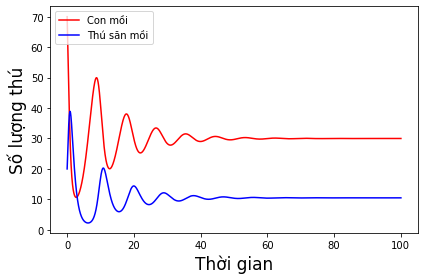

In [41]:
y1  = [];
y2  = [];
y3  = [];
y4  = [];
x   = [];

for xx in ketqua: x.append(xx[0]);
for xx in ketqua: y1.append(xx[1][0]), y2.append(xx[1][1]);

plt.plot(x, y1, 'r')
plt.plot(x, y2, 'b')
plt.legend(["Con mồi", "Thú săn mồi"], loc=2)

plt.xlabel('Thời gian', fontsize=17)
plt.ylabel('Số lượng thú', fontsize=17)
plt.tight_layout()
plt.show()

Đồ thị liên hệ giữa các $y_{i}$:

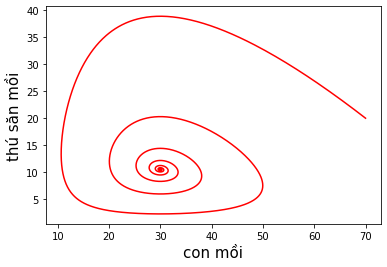

In [42]:
y1  = [];
y2  = [];
y3  = [];
y4  = [];
x   = [];

for xx in ketqua: x.append(xx[0]);
for xx in ketqua: y1.append(xx[1][0]), y2.append(xx[1][1]);
plt.xlabel('con mồi', fontsize=15)
plt.ylabel('thú săn mồi', fontsize=15)

plt.plot(y1, y2, 'r')
plt.show()